In [196]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas as hvplot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [197]:
# Load the data into a Pandas DataFrame
crypto_market_data_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
crypto_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [198]:
# Generate summary statistics
crypto_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [199]:
# Plot your data to see what's in your DataFrame
crypto_market_data_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [200]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled=StandardScaler().fit_transform(crypto_market_data_df[["price_change_percentage_24h", 
                    "price_change_percentage_7d","price_change_percentage_14d", "price_change_percentage_30d",
                    "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])
crypto_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [201]:
# Create a DataFrame with the scaled data
crypto_scaled_df= pd.DataFrame(crypto_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d',	'price_change_percentage_1y'])
# Copy the crypto names from the original data
#coins = list(crypto_market_data_df.index) #this returns a list of all the coin names from the original data
crypto_scaled_df['coin_id']= crypto_market_data_df.index
# Set the coinid column as index
crypto_scaled_df=crypto_scaled_df.set_index('coin_id')
# Display sample data
crypto_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [202]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(crypto_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}   

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051


In [203]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** In analyzing the elbow it appears the best best value for K is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [204]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=1)

In [205]:
# Fit the K-Means model using the scaled data
k_model.fit(crypto_scaled_df)  

KMeans(n_clusters=4, random_state=1)

In [206]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = k_model.predict(crypto_scaled_df)
# View the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [207]:
# Create a copy of the DataFrame
predicted_clusters = crypto_scaled_df.copy()

In [208]:
# Add a new column to the DataFrame with the predicted clusters
predicted_clusters["predicted_cluster"] = k_4
# Display sample data
predicted_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [209]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predicted_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols = 'coin_id'
)

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [210]:
# Create a PCA model instance and set `n_components=3`.
pca_mdl = PCA(n_components=3)

In [211]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_clusters = pca_mdl.fit_transform(crypto_scaled_df)

# View the first five rows of the DataFrame. 
pca_clusters[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [212]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_mdl.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [213]:
sum(pca_mdl.explained_variance_ratio_)

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Adding up the variances would be 0.3719856+0.34700813+0.17603793=0.8950316570309841.Approximately 89% of the total variance is captured within the three PCA variables, with a value of 0.8950316570309841. This represents a significant proportion of the variance, indicating a high level of predictability. High variance is desirable in this context, as it suggests the data points are spread out rather than tightly clustered around the mean. When the variance is too low, it becomes difficult for algorithms to accurately detect patterns or trends, which can hinder predictive performance. For cryptocurrency markets, where price trends are highly volatile, capturing high variance is essential for effectively modeling and predicting price movements.

In [214]:
# Create a new DataFrame with the PCA data.
pca_clusters_df = pd.DataFrame(
    pca_clusters, 
    columns=["PCA1","PCA2","PCA3"]
)
# Copy the crypto names from the original data
pca_clusters_df['coin_id'] = crypto_scaled_df.index
# Set the coinid column as index
pca_clusters_df = pca_clusters_df.set_index('coin_id')
# Display sample data
pca_clusters_df[:5]

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [226]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values2 = list(range(1, 11))

# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values2:
    # Create a KMeans model using the loop counter for the number of clusters
    k_model2 = KMeans(n_clusters=i, random_state=1)
    # Fit the model to the data using PCA DataFrame
    k_model2.fit(pca_clusters_df)
    # Append the model.inertia_ (which measures clustering quality) to the inertia list
    inertia2.append(k_model2.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {
    'k': k_values2,
    'inertia': inertia2
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data2)

# Display the DataFrame
elbow_df2

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


In [227]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best k-value is `k=4` when using PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The k value remains the same as the original data, but the inertia is reduced to 49 from 79. Lower inertia indicates more tightly clustered data, which is beneficial for clear cluster separation, reducing noise, and identifying market regimes and behavior patterns. This enhances pattern recognition and improves predictability by highlighting similar characteristics within clusters.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [217]:
# Initialize the K-Means model using the best value for k
km_mdl = KMeans(n_clusters=4, random_state=1)

In [218]:
# Fit the K-Means model using the PCA data
km_mdl.fit(pca_clusters_df)

KMeans(n_clusters=4, random_state=1)

In [219]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clustrs_pred = km_mdl.predict(pca_clusters_df)

# Print the resulting array of cluster values.
clustrs_pred

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [220]:
# Create a copy of the DataFrame with the PCA data
cpy_pca_clusters_df = pca_clusters_df.copy()

# Add a new column to the DataFrame with the predicted clusters
cpy_pca_clusters_df['PredictedCluster'] = clustrs_pred

# Display sample data
cpy_pca_clusters_df.head()

,PCA1,PCA2,PCA3,PredictedCluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [221]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
cpy_pca_clusters_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by = 'PredictedCluster',
    hover_cols='coin_id'
)


:NdOverlay   [PredictedCluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [222]:
# Use the columns from the original scaled DataFrame as the index.
weighted_feature_df = pd.DataFrame(crypto_scaled_df)

# Get the column names from the DataFrame
columns_list = weighted_feature_df.columns.tolist()

# Set the columns as the index
weighted_feature_df.set_index(columns_list, inplace=True)
weighted_feature_df[0:5]


,,,,,,
price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [228]:
# Initialize the PCA model specifying the number of components
PCA_model = PCA(n_components=3)

# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components
principal_components = PCA_model.fit_transform(crypto_scaled_df)

# Display sample data
#principal_components[:5]

# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. 
pca_component_weights = pd.DataFrame(PCA_model.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=crypto_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** USING Dataframe
    * price_change_percentage_200d & price_change_percentage_1y have the strongest positive influence on PCA1, while price_change_percentage_24h has the strongest negative influence on PCA1.
    * price_change_percentage_30d & price_change_percentage_14d have the strongest positive influence on PCA2, while price_change_percentage_1y has a strong negative influence on PCA2.
    * price_change_percentage_7d & price_change_percentage_14d have the strongest positive influence on PCA3, while price_change_percentage_60d has the strongest negative influence on PCA3.    

In [224]:
# Fit PCA to your data
PCA_model.fit(crypto_scaled_df)

# Loop through each principal component
for i, component in enumerate(PCA_model.components_):
    print(f"Principal Component {i + 1}:")
    
    # Sort coefficients by absolute value to identify features with strongest influence
    sorted_indices = np.argsort(np.abs(component))[::-1]
    
    # Print the top features with strongest influence
    for j in sorted_indices:
        feature_name = crypto_scaled_df.columns[j]  # Use df_crypto_market_data columns
        coefficient = component[j]
        print(f"Feature: {feature_name}, Coefficient: {coefficient:.4f}")
    
    print("\n")

Principal Component 1:
Feature: price_change_percentage_200d, Coefficient: 0.5945
Feature: price_change_percentage_1y, Coefficient: 0.5684
Feature: price_change_percentage_24h, Coefficient: -0.4167
Feature: price_change_percentage_60d, Coefficient: 0.3204
Feature: price_change_percentage_30d, Coefficient: 0.1915
Feature: price_change_percentage_7d, Coefficient: -0.1024
Feature: price_change_percentage_14d, Coefficient: -0.0092


Principal Component 2:
Feature: price_change_percentage_30d, Coefficient: 0.5622
Feature: price_change_percentage_14d, Coefficient: 0.5404
Feature: price_change_percentage_60d, Coefficient: 0.4340
Feature: price_change_percentage_24h, Coefficient: 0.3582
Feature: price_change_percentage_7d, Coefficient: 0.2274
Feature: price_change_percentage_1y, Coefficient: -0.1508
Feature: price_change_percentage_200d, Coefficient: 0.0277


Principal Component 3:
Feature: price_change_percentage_7d, Coefficient: 0.7877
Feature: price_change_percentage_60d, Coefficient: -0.36

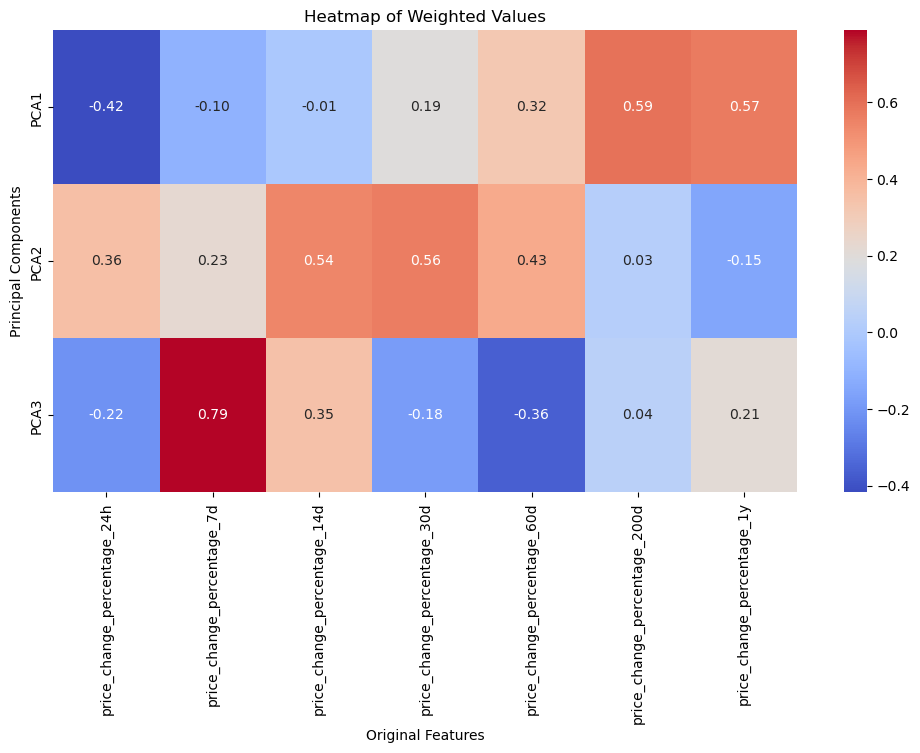

In [225]:
# Extract loadings from the PCA model
weighted_values = PCA_model.components_

# Create a heatmap of loadings
new_ylabels = ['PCA1', 'PCA2', 'PCA3']

plt.figure(figsize=(12, 6))
ax = sns.heatmap(weighted_values, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=crypto_scaled_df.columns)
ax.set_yticklabels(new_ylabels)
plt.title("Heatmap of Weighted Values")
plt.xlabel("Original Features")

plt.ylabel("Principal Components")
plt.show()

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** USING HEATMAP
    * Feature "price_change_percentage_200d" has the strongest positive influence (0.59) on PCA1, while Feature "price_change_percentage_24h" has the strongest negative influence (-0.42) on PCA1.
    * Feature "price_change_percentage_30d" has the strongest positive influence (0.56) on PCA2, while Feature "price_change_percentage_1y" has the strongest negative influence (-0.15) on PCA2.
    * Feature "price_change_percentage_7d" has the strongest positive influence (0.79) on PCA3, while Feature "price_change_percentage_60d" has the strongest negative influence (-0.36) on PCA3.   